#STEPS


In [1]:
#WORKFLOW :
#1)Load Data
#2)Check Missing Values ( If Exist ; Fill each record with mean of its feature )
#3)Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
#4)Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
#5)Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
#6)Train the Model with Epochs (100) and validate it
#7)If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
#8)Evaluation Step
#9)Prediction 

In [2]:
import math
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

In [3]:
data = pd.read_csv("compresive_strength_concrete.csv")
print(data.shape)
print(len(data))
data.head()

(1030, 9)
1030


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data = shuffle(data)
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28,10.54
304,277.1,0.0,97.4,160.6,11.8,973.9,875.6,3,23.14
39,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
593,252.5,0.0,0.0,185.7,0.0,1111.6,784.3,7,11.48
966,154.8,0.0,142.8,193.3,9.1,1047.4,696.7,28,12.46


In [5]:
copy1= data.copy()

copy1 = copy1.fillna(copy1.mean())
copy1 = np.array(copy1)

In [6]:
train_size = math.ceil(int(len(copy1))*0.5)
print(train_size)
test_size = math.ceil(int(len(copy1))*0.3)
print(test_size)
validation_data_size = math.ceil(int(len(copy1))*0.2)
print(validation_data_size)
515+309+206

515
309
206


1030

In [17]:
train_data = copy1[:515].astype("float64")
test_data = copy1[515:824].astype('float64')
validation_data = copy1[824:1030].astype('float64')

In [18]:
train_label = copy1[:train_size, 8:9]
print(train_label)
test_label = copy1[:test_size,8:9]
print(test_label)
validation_label = copy1[:validation_data_size,8:9]
print(validation_label)

[[10.54]
 [23.14]
 [36.25]
 [11.48]
 [12.46]
 [23.4 ]
 [19.35]
 [33.4 ]
 [28.47]
 [76.24]
 [29.45]
 [54.1 ]
 [19.54]
 [26.32]
 [44.39]
 [24.39]
 [ 9.74]
 [39.58]
 [22.72]
 [39.09]
 [ 9.99]
 [49.99]
 [68.5 ]
 [27.23]
 [55.26]
 [ 2.33]
 [26.26]
 [17.28]
 [61.09]
 [17.44]
 [13.57]
 [17.17]
 [46.25]
 [55.9 ]
 [20.87]
 [25.18]
 [45.9 ]
 [55.51]
 [16.89]
 [32.77]
 [ 3.32]
 [33.05]
 [51.73]
 [60.29]
 [32.66]
 [71.7 ]
 [54.9 ]
 [33.21]
 [74.36]
 [65.2 ]
 [37.91]
 [17.57]
 [63.14]
 [45.37]
 [27.63]
 [50.6 ]
 [48.7 ]
 [25.42]
 [40.06]
 [43.58]
 [62.05]
 [50.24]
 [13.22]
 [19.42]
 [42.22]
 [48.67]
 [67.8 ]
 [15.58]
 [35.17]
 [13.2 ]
 [15.61]
 [17.96]
 [37.34]
 [24.  ]
 [48.99]
 [26.94]
 [13.46]
 [33.02]
 [80.2 ]
 [ 6.27]
 [31.03]
 [75.5 ]
 [19.42]
 [40.66]
 [18.13]
 [ 7.32]
 [46.23]
 [15.44]
 [20.28]
 [59.76]
 [21.5 ]
 [19.77]
 [21.06]
 [26.92]
 [39.3 ]
 [72.3 ]
 [15.52]
 [67.57]
 [37.8 ]
 [19.11]
 [41.54]
 [38.56]
 [42.92]
 [32.82]
 [27.04]
 [53.96]
 [35.3 ]
 [33.95]
 [66.7 ]
 [33.76]
 [66.95]
 

In [39]:
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_label)
test_labels = to_categorical(test_label)
validation_labels = to_categorical(validation_label)

In [40]:
print(validation_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]




encoder = LabelEncoder()
encoder.fit(copy1[:,:8])

y_train = encoder.transform(train_labels)
y_train_v = encoder.transform(validation_labels)
y_test = encoder.transform(test_labels)

y_train

In [30]:

model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(9,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
#model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


In [31]:
history = model.fit(train_data,
train_label,
epochs=100,
batch_size=4
        )

Train on 515 samples
Epoch 1/100
515/515 [==============================] - 2s 3ms/sample - loss: 1507.0037 - mae: 25.5513
Epoch 2/100
515/515 [==============================] - 0s 782us/sample - loss: 380.7014 - mae: 15.8865
Epoch 3/100
515/515 [==============================] - 0s 763us/sample - loss: 251.6524 - mae: 12.6506
Epoch 4/100
515/515 [==============================] - 0s 765us/sample - loss: 200.4352 - mae: 11.2568
Epoch 5/100
515/515 [==============================] - 0s 738us/sample - loss: 130.3328 - mae: 9.2822
Epoch 6/100
515/515 [==============================] - 0s 763us/sample - loss: 113.0492 - mae: 8.4372
Epoch 7/100
515/515 [==============================] - 0s 715us/sample - loss: 94.5642 - mae: 7.8428
Epoch 8/100
515/515 [==============================] - 0s 741us/sample - loss: 88.8697 - mae: 7.5248
Epoch 9/100
515/515 [==============================] - 0s 759us/sample - loss: 85.2016 - mae: 7.4627
Epoch 10/100
515/515 [==============================] - 0s 75

515/515 [==============================] - 0s 685us/sample - loss: 9.9719 - mae: 2.4750
Epoch 81/100
515/515 [==============================] - 0s 696us/sample - loss: 10.1752 - mae: 2.7123
Epoch 82/100
515/515 [==============================] - 0s 730us/sample - loss: 10.0144 - mae: 2.5745
Epoch 83/100
515/515 [==============================] - 0s 705us/sample - loss: 9.8945 - mae: 2.5151
Epoch 84/100
515/515 [==============================] - 0s 767us/sample - loss: 9.0551 - mae: 2.5573
Epoch 85/100
515/515 [==============================] - 0s 786us/sample - loss: 10.2124 - mae: 2.8357
Epoch 86/100
515/515 [==============================] - 0s 778us/sample - loss: 9.0766 - mae: 2.5788
Epoch 87/100
515/515 [==============================] - 0s 725us/sample - loss: 9.5153 - mae: 2.5530
Epoch 88/100
515/515 [==============================] - 0s 699us/sample - loss: 9.0050 - mae: 2.5907
Epoch 89/100
515/515 [==============================] - 0s 726us/sample - loss: 9.0629 - mae: 2.4674


In [32]:

history = model.fit(train_data,
train_label,
epochs=100,
batch_size=4,
validation_data= (validation_data,validation_label)        )

Train on 515 samples, validate on 206 samples
Epoch 1/100
515/515 [==============================] - 1s 1ms/sample - loss: 7.2989 - mae: 2.2106 - val_loss: 595.8565 - val_mae: 19.8796
Epoch 2/100
515/515 [==============================] - 0s 917us/sample - loss: 6.8709 - mae: 2.2086 - val_loss: 594.5438 - val_mae: 19.8296
Epoch 3/100
515/515 [==============================] - 0s 907us/sample - loss: 7.1422 - mae: 2.3480 - val_loss: 595.9936 - val_mae: 19.8579
Epoch 4/100
515/515 [==============================] - 0s 935us/sample - loss: 6.8540 - mae: 2.1293 - val_loss: 609.9429 - val_mae: 20.0938
Epoch 5/100
515/515 [==============================] - 0s 887us/sample - loss: 6.8907 - mae: 2.1205 - val_loss: 607.9381 - val_mae: 20.0716
Epoch 6/100
515/515 [==============================] - 0s 906us/sample - loss: 6.2806 - mae: 2.1115 - val_loss: 598.8467 - val_mae: 19.9135
Epoch 7/100
515/515 [==============================] - 0s 914us/sample - loss: 6.0891 - mae: 2.0166 - val_loss: 616.

515/515 [==============================] - 0s 953us/sample - loss: 3.2661 - mae: 1.5993 - val_loss: 603.4623 - val_mae: 19.9958
Epoch 60/100
515/515 [==============================] - 0s 876us/sample - loss: 3.1273 - mae: 1.5751 - val_loss: 597.1115 - val_mae: 19.9222
Epoch 61/100
515/515 [==============================] - 0s 855us/sample - loss: 3.0807 - mae: 1.4382 - val_loss: 601.4818 - val_mae: 19.9813
Epoch 62/100
515/515 [==============================] - 0s 886us/sample - loss: 3.1893 - mae: 1.5452 - val_loss: 605.8216 - val_mae: 20.0371
Epoch 63/100
515/515 [==============================] - 0s 881us/sample - loss: 2.9445 - mae: 1.4382 - val_loss: 605.9916 - val_mae: 20.0375
Epoch 64/100
515/515 [==============================] - 0s 873us/sample - loss: 3.2252 - mae: 1.4805 - val_loss: 611.6441 - val_mae: 20.1747
Epoch 65/100
515/515 [==============================] - 0s 877us/sample - loss: 3.0474 - mae: 1.4959 - val_loss: 603.4913 - val_mae: 20.0422
Epoch 66/100
515/515 [====

In [33]:
history_dict_v = history.history
history_dict_v.keys()


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

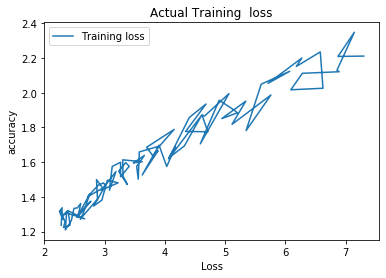

In [34]:
import matplotlib.pyplot as plt
loss = history_dict_v['loss']
accuracy = history_dict_v['mae']
plt.plot(loss,accuracy, label='Training loss')
plt.title('Actual Training  loss')
plt.xlabel('Loss')
plt.ylabel('accuracy')
plt.legend()

plt.show()

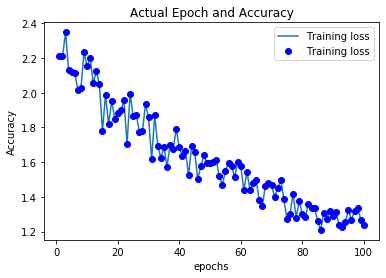

In [36]:

loss = history_dict_v['loss']
epochs = range(1, len(accuracy) + 1)
accuracy = history_dict_v['mae']
accuracyv = history_dict_v['mae']
plt.plot(epochs,accuracyv, label='Training loss')
plt.plot(epochs,accuracy,'bo', label='Training loss')
plt.title('Actual Epoch and Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [37]:
results = model.evaluate(test_data, test_label)

309/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================